<a href="https://colab.research.google.com/github/mikhaelos11/FourierTransform_and_InverseFourierTransform/blob/main/FT_and_IFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import librosa
import librosa.display
import scipy as sp
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#incarcare player audio
cale_audio = "note.wav"
ipd.Audio(cale_audio)

In [5]:
#extragere fisier audio
semnal, er = librosa.load(cale_audio)

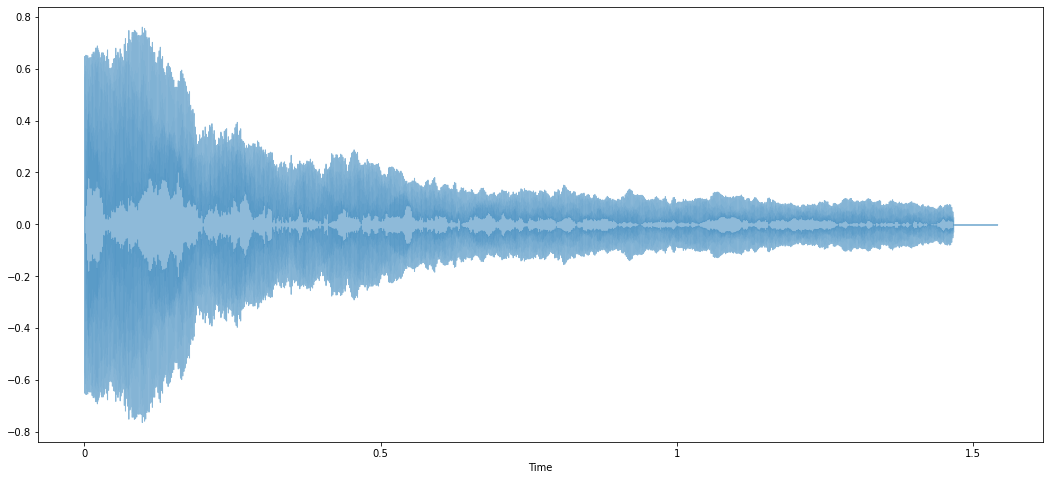

In [6]:
#afisare forma de unda
plt.figure(figsize=(18,8))
librosa.display.waveshow(semnal, sr=er, alpha=0.5)
plt.show()

In [7]:
#derivare spectru utilizand Transformata Fourier
tf = sp.fft.fft(semnal)
magnitudine = np.absolute(tf)
frecventa = np.linspace(0, er, len(magnitudine))

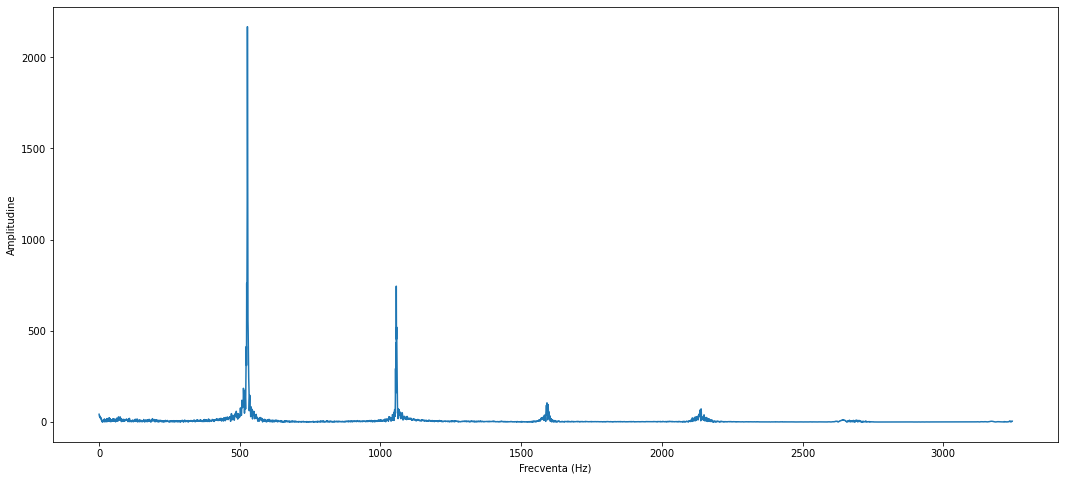

In [8]:
#afisare spectru
plt.figure(figsize=(18,8))
plt.plot(frecventa[0:5000], magnitudine[0:5000]) #spectrul magnitudinii
plt.xlabel("Frecventa (Hz)")
plt.ylabel("Amplitudine")
plt.show()

In [9]:
print(f"Lungimea semnalului este:{len(semnal)} esantioane")

d = 1/er
d

d_523 = 1 / 523

print(f"Durata unui ciclu a fundamentalei este:{d_523} secunde")

d_400_esantioane = 400 * d

Lungimea semnalului este:33968 esantioane
Durata unui ciclu a fundamentalei este:0.0019120458891013384 secunde


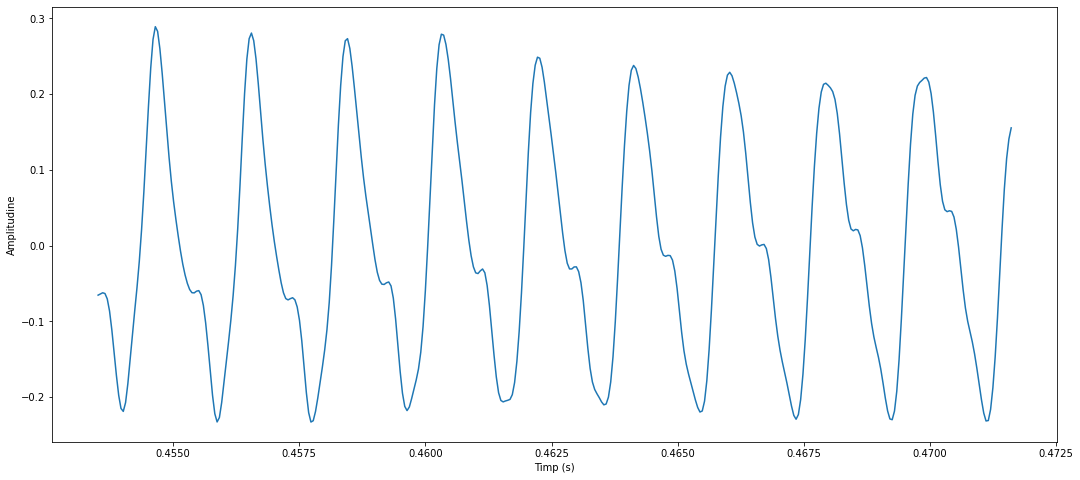

In [10]:
#vizualizarea unei portiuni din semnal
esantioane = range(len(semnal))
t = librosa.samples_to_time(esantioane, sr=er)

plt.figure(figsize=(18,8))
plt.plot(t[10000:10400],semnal[10000:10400])
plt.xlabel("Timp (s)")
plt.ylabel("Amplitudine")
plt.show()

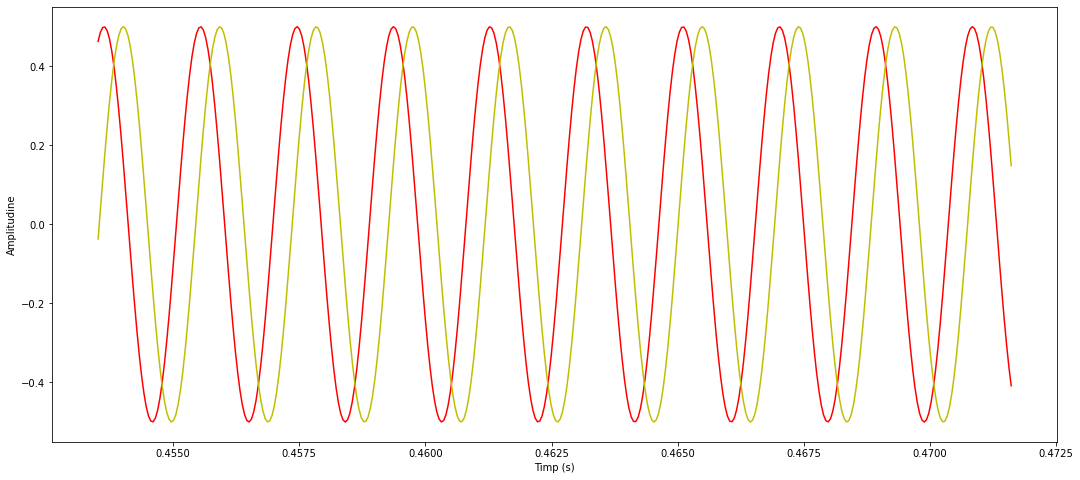

In [11]:
#generarea unui semnal sinusoidal

f = 523
faza = 0
faza_2 = 0.2
sin = 0.5 * np.sin(2 * np.pi * (f * t - faza))
sin2 = 0.5 * np.sin(2 * np.pi * (f * t - faza_2))

plt.figure(figsize=(18,8))
plt.plot(t[10000:10400], sin[10000:10400], color= 'r')
plt.plot(t[10000:10400], sin2[10000:10400], color= 'y')

plt.xlabel("Timp (s)")
plt.ylabel("Amplitudine")
plt.show()

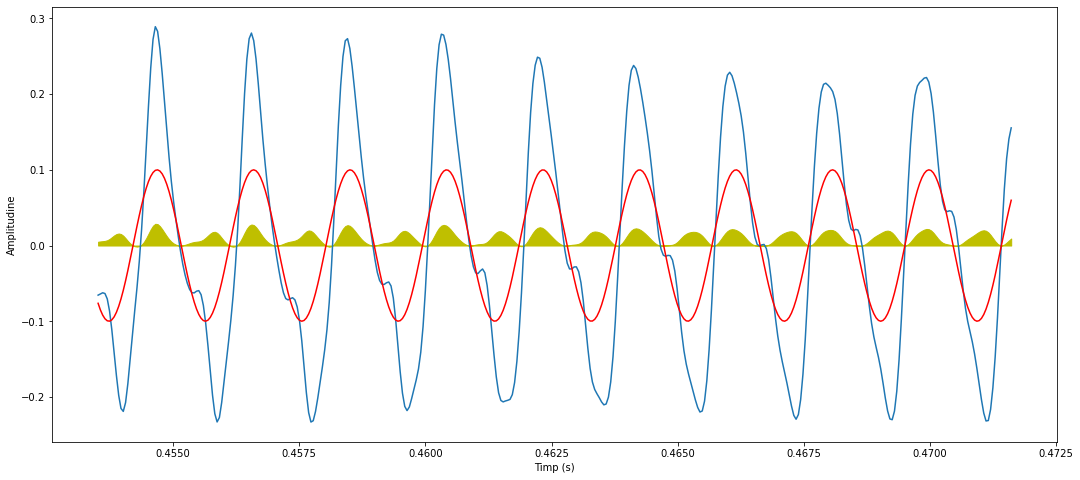

In [12]:
#comparare semnal si sinusoida
f = 523
faza = 0.55
sin = 0.1 * np.sin(2*np.pi * (f * t - faza))
plt.figure(figsize=(18,8))
plt.plot(t[10000:10400], semnal[10000:10400])
plt.plot(t[10000:10400], sin[10000:10400], color='r')

plt.fill_between(t[10000:10400], sin[10000:10400]*semnal[10000:10400], color='y')
plt.xlabel("Timp (s)")
plt.ylabel("Amplitudine")
plt.show()

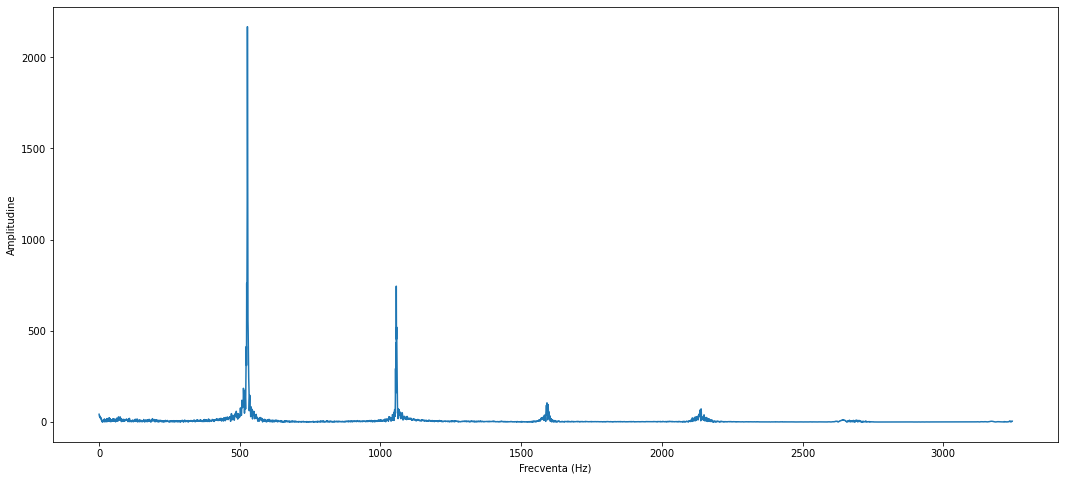

In [13]:
#afisare spectru
plt.figure(figsize=(18, 8))
plt.plot(frecventa[0:5000], magnitudine[:5000]) #spectrul amplitudinii
plt.xlabel("Frecventa (Hz)")
plt.ylabel("Amplitudine")
plt.show()

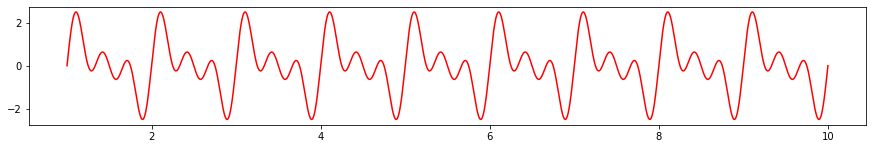

In [14]:
#refacerea semnalului folosint IFT(domeniul frcventa->timp
#suprapunerea tonurilor pure
f = 1
t = np.linspace(1, 10, 10000)

sin = np.sin(2*np.pi * (f * t))
sin2 = np.sin(2*np.pi * (2*f * t))
sin3 = np.sin(2*np.pi * (3*f * t))

suma_semnal = sin + sin2 + sin3
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(t, suma_semnal, color='r')

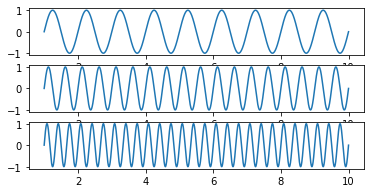

In [15]:
#descompunerea in frecvente armonice
plt.subplot(4, 1, 2)
plt.plot(t, sin)

plt.subplot(4, 1, 3)
plt.plot(t, sin2)

plt.subplot(4, 1, 4)
plt.plot(t, sin3)

plt.show()